In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/project/MLKinCompBioFinalProject


In [2]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data")
H5AD_V2_DIR = os.path.join(
    DATA_DIR, "abc_atlas", "expression_matrices", "WMB-10Xv2", "20230630"
)
H5AD_V3_DIR = os.path.join(
    DATA_DIR, "abc_atlas", "expression_matrices", "WMB-10Xv3", "20230630"
)


print(f"{'BASE_DIR':<15}{BASE_DIR}")
print(f"{'DATA_DIR':<15}{DATA_DIR}")
print(f"{'H5AD_V2_DIR':<15}{H5AD_V2_DIR}")
print(f"{'H5AD_V3_DIR':<15}{H5AD_V3_DIR}")

BASE_DIR       /home/cotsios/dsit/2nd-semester/ml-in-comp-bio/project/MLKinCompBioFinalProject
DATA_DIR       /home/cotsios/dsit/2nd-semester/ml-in-comp-bio/project/MLKinCompBioFinalProject/data
H5AD_V2_DIR    /home/cotsios/dsit/2nd-semester/ml-in-comp-bio/project/MLKinCompBioFinalProject/data/abc_atlas/expression_matrices/WMB-10Xv2/20230630
H5AD_V3_DIR    /home/cotsios/dsit/2nd-semester/ml-in-comp-bio/project/MLKinCompBioFinalProject/data/abc_atlas/expression_matrices/WMB-10Xv3/20230630


In [3]:
hy_v2_path = os.path.join(
    H5AD_V2_DIR,
    "WMB-10Xv2-HY-log2.h5ad"
)
hy_v3_path = os.path.join(
    H5AD_V3_DIR,
    "WMB-10Xv3-HY-log2.h5ad"
)

print(f"{'hy_v2_path':<15}{hy_v2_path}")
print(f"{'hy_v3_path':<15}{hy_v3_path}")

hy_v2_path     /home/cotsios/dsit/2nd-semester/ml-in-comp-bio/project/MLKinCompBioFinalProject/data/abc_atlas/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HY-log2.h5ad
hy_v3_path     /home/cotsios/dsit/2nd-semester/ml-in-comp-bio/project/MLKinCompBioFinalProject/data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2.h5ad


In [4]:
from src.utils import load_data

import numpy as np
import gc

In [5]:
hy_v2 = load_data(hy_v2_path, backed="r")
hy_v3 = load_data(hy_v3_path, backed="r")

Finding highly variable genes...
Scaling data...


/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/project/MLKinCompBioFinalProject/.env/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.12/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


Performing PCA...


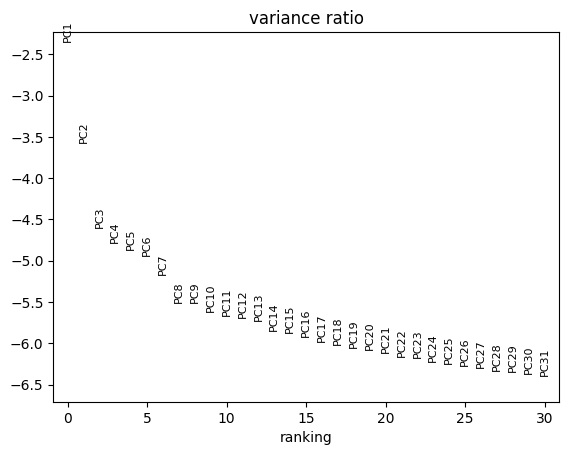

Computing neighbors...


/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/project/MLKinCompBioFinalProject/.env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Louvain clustering...


ImportError: Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`.

In [6]:
import scanpy as sc

adata = hy_v2.to_memory()

print("Finding highly variable genes...")
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor="seurat")
adata = adata[:, adata.var.highly_variable].copy()

print("Scaling data...")
sc.pp.scale(adata, max_value=10)

print("Performing PCA...")
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

print("Computing neighbors...")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)

print("Louvain clustering...")
sc.tl.leiden(adata, resolution=0.5)

print("Computing UMAP...")
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"])

print("Ranking genes...")
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

